In [471]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Data Dictionary

In [472]:
data=pd.read_csv('C:\\Users\\Subbu\\Desktop\\codealpha intern\\titanic.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [473]:
data.shape

(891, 12)

We are having 891 records and 12 features

In [474]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 5 categorical columns and 7 numerical columns

## Checking for the null values

In [475]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In the columns Age and deck there are null values.

### Five point summary for numerical columns

In [476]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Five point summary for cateegorical columns

In [477]:
data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [478]:
values=data['Survived'].value_counts()
values

0    549
1    342
Name: Survived, dtype: int64

#### 1.The value of 0 represents people who are not survived

#### 2.The value of 1 represents people who are survived

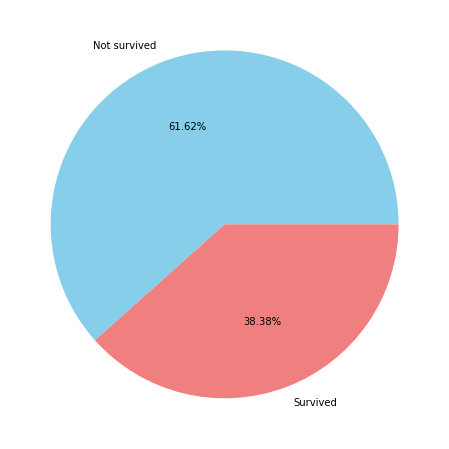

In [479]:
plt.figure(figsize=(8,8))
colors = ['skyblue', 'lightcoral', 'lightgreen']
plt.pie(x=values,labels=['Not survived', 'Survived'], autopct='%.2f%%', colors=colors)
plt.show()

The above plot says that 61.62% people are not survived and 38.38% people are survived

## Univariate Analysis

## Sex

In [480]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

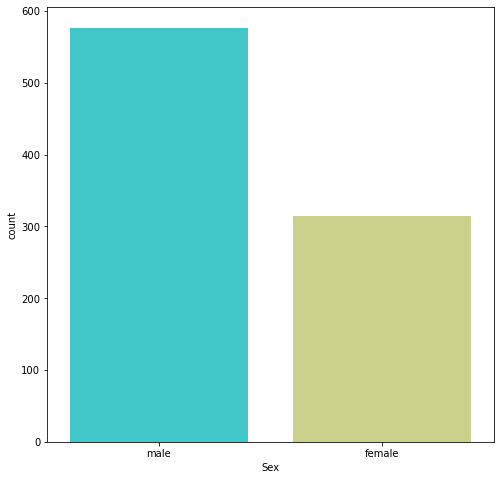

In [481]:
plt.figure(figsize=(8,8))
sns.countplot(data['Sex'], palette='rainbow')
plt.show()

There are maximum males with a count of 577 and less females with count of 314.

In [482]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

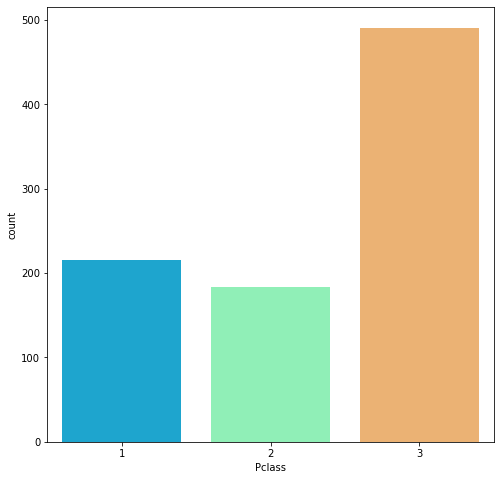

In [483]:
plt.figure(figsize=(8,8))
sns.countplot(data['Pclass'], palette='rainbow')
plt.show()

The maximum passengers are in 3rd P class with a count of 491.

## Siblings/ Spouses

In [484]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

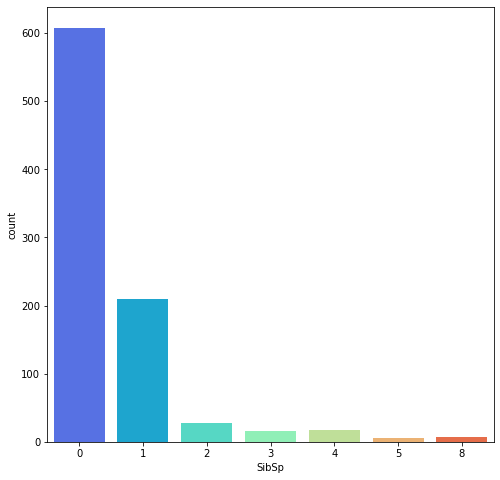

In [485]:
plt.figure(figsize=(8,8))
sns.countplot(data['SibSp'], palette='rainbow')
plt.show()

1.The passenger count having no siblings/spouses is 608.

2.The passenger count having 1 sibling is 209.

3.The passenger coint having 2 sibling is 28.

4.The passenger having 4 siblings or spouses is 18.

## Parents / Children

In [486]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

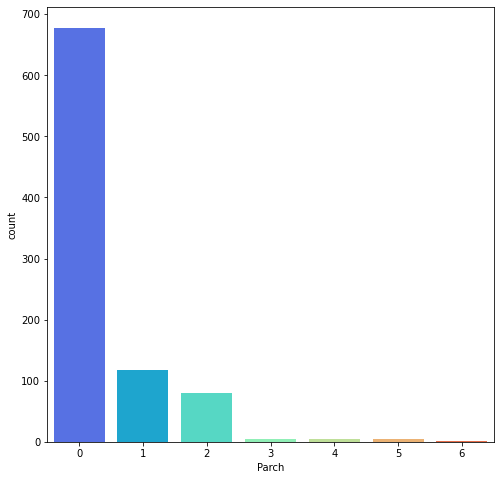

In [487]:
plt.figure(figsize=(8,8))
sns.countplot(data['Parch'], palette='rainbow')
plt.show()

The count of passengers who are not having any parents or children in the titanic are more(678).

### Age

In [488]:
data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

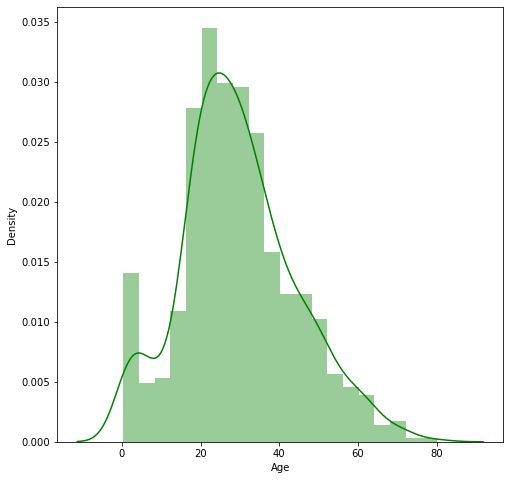

In [489]:
plt.figure(figsize=(8,8))
sns.distplot(data['Age'], kde=True, color='green' )
plt.show()

1.There are maximum passengers with age 24 with a count of 30.

2.The data is normally distributed.

## Fare

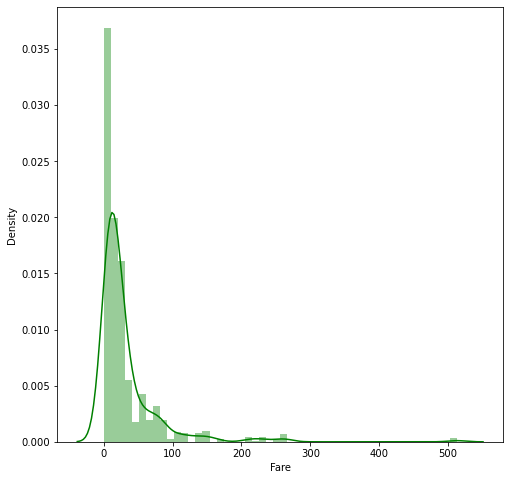

In [490]:
plt.figure(figsize=(8,8))
sns.distplot(data['Fare'], kde=True, color='green' )
plt.show()

In the above fare column distribution the data is right skewed (for some passengers the fares are extremely high).
Hence, we can observe some outliers.

PassengerId


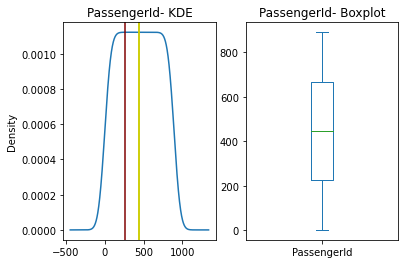

skew PassengerId 0.0
kurt PassengerId -1.1999999999999997
mean PassengerId 446.0
median PassengerId 446.0
mode PassengerId 1
std PassengerId 257.3538420152301
var PassengerId 66231.0
Survived


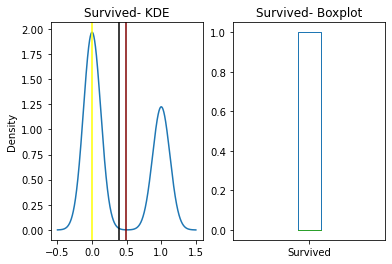

skew Survived 0.4785234382949897
kurt Survived -1.775004671066304
mean Survived 0.3838383838383838
median Survived 0.0
mode Survived 0
std Survived 0.4865924542648585
var Survived 0.2367722165474984
Pclass


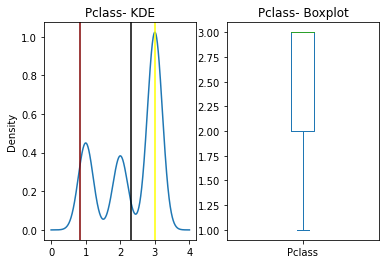

skew Pclass -0.6305479068752845
kurt Pclass -1.2800149715782825
mean Pclass 2.308641975308642
median Pclass 3.0
mode Pclass 3
std Pclass 0.8360712409770513
var Pclass 0.6990151199889065
Age


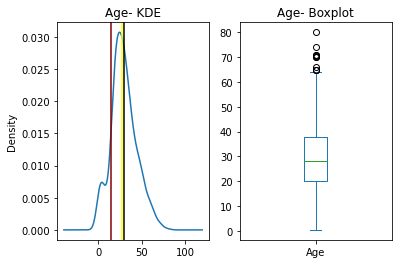

skew Age 0.38910778230082704
kurt Age 0.17827415364210353
mean Age 29.69911764705882
median Age 28.0
mode Age 24.0
std Age 14.526497332334044
var Age 211.0191247463081
SibSp


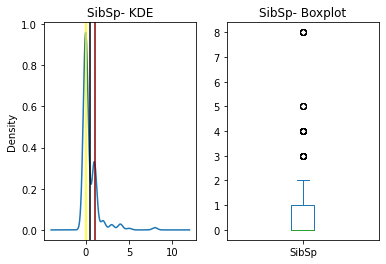

skew SibSp 3.6953517271630565
kurt SibSp 17.880419726645968
mean SibSp 0.5230078563411896
median SibSp 0.0
mode SibSp 0
std SibSp 1.1027434322934275
var SibSp 1.2160430774662894
Parch


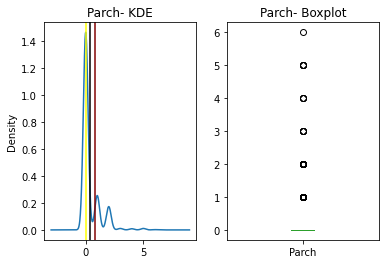

skew Parch 2.7491170471010933
kurt Parch 9.778125179021648
mean Parch 0.38159371492704824
median Parch 0.0
mode Parch 0
std Parch 0.8060572211299559
var Parch 0.6497282437357467
Fare


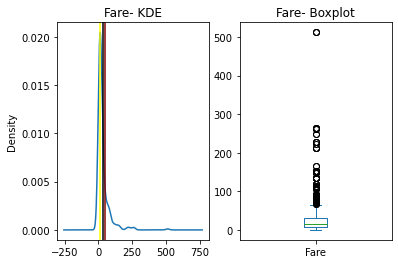

skew Fare 4.787316519674893
kurt Fare 33.39814088089868
mean Fare 32.2042079685746
median Fare 14.4542
mode Fare 8.05
std Fare 49.693428597180905
var Fare 2469.436845743117


In [491]:
for i in (data.select_dtypes('number')).columns:
    print(i)
    plt.subplot(1,2,1)
    data[i].plot(kind='kde')
    plt.title(i+'- KDE')
    plt.axvline(data[i].mean(),color='black')
    plt.axvline(data[i].median(),color='yellow')
    plt.axvline(data[i].std(),color='maroon')
    plt.subplot(1,2,2)
    plt.title(i+'- Boxplot')
    data[i].plot(kind='box')
    plt.show()
    print('skew '+i,data[i].skew())
    print('kurt '+i,data[i].kurt())
    print('mean '+i,data[i].mean())
    print('median '+i,data[i].median())
    print('mode '+i,data[i].mode()[0])
    print('std '+i,data[i].std())
    print('var '+i,data[i].var())

## Outlier Treatment by Capping method

<AxesSubplot:>

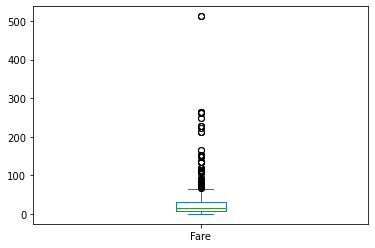

In [492]:
data['Fare'].plot(kind='box')

Hence, we observed some outliers in the fare column. We should treat them or else it may effect 
the whole data and may cause inaccurate predictions

In [493]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 -(1.5*IQR)
upper_whisker = Q3 + (1.5*IQR)
data['Fare']=np.where(data['Fare']>upper_whisker,upper_whisker,
                      np.where(data['Fare']<lower_whisker,lower_whisker,data['Fare']))

In [494]:
data.shape

(891, 12)

<AxesSubplot:>

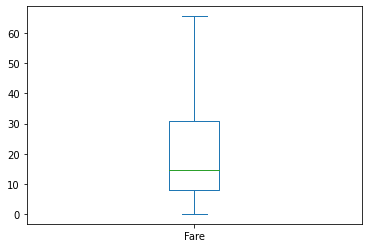

In [495]:
data['Fare'].plot(kind='box')

## Bivariate Analysis

### Survival Rate by class

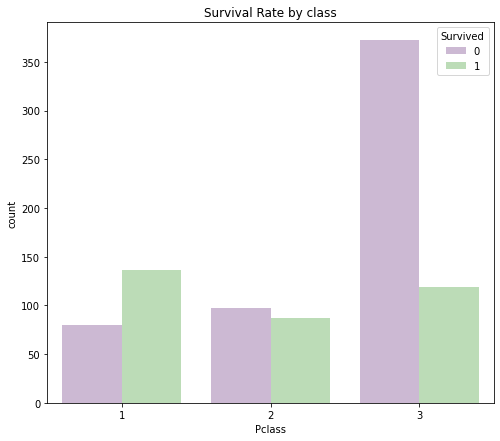

In [496]:
plt.figure(figsize=(8,7))
sns.countplot(x='Pclass', hue='Survived', data=data, palette='PRGn')
plt.title('Survival Rate by class')
plt.show()

1.The passengers who are from 1st P class have survived more in comparision to other P classes 2nd and 3rd.

2.The survival rate is very much less in the 2nd and 3rd P classes.

### Survival Rate by Sex

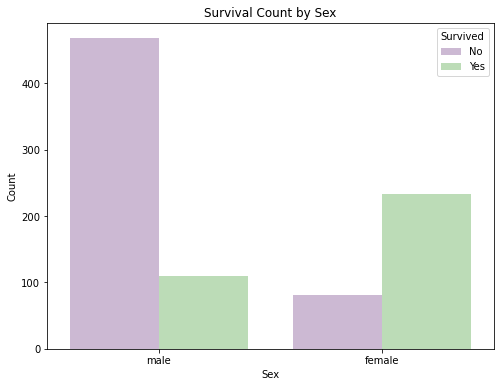

In [497]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=data, palette='PRGn')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

The survival rate male is very less compared to females.

### Survival Rate By Age Group

In [498]:
data['Age Group']=pd.cut(data['Age'], bins=[0,18,35,50,100], labels=['0-18', '19-35', '36-50','50-100'])

In [499]:
data['Age Group'].value_counts()

19-35     358
36-50     153
0-18      139
50-100     64
Name: Age Group, dtype: int64

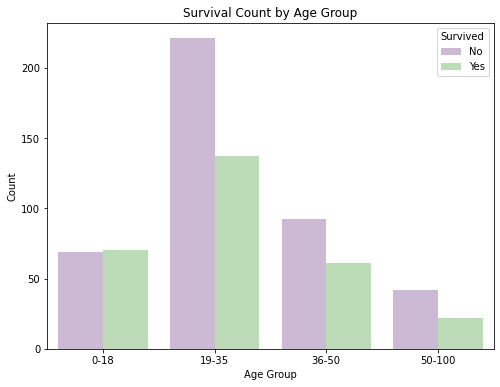

In [500]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Age Group', hue='Survived', data=data, palette='PRGn')
plt.title('Survival Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

The death rate is more in the age group 19-35 (358).

### Survival Rate By SibSp

In [501]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

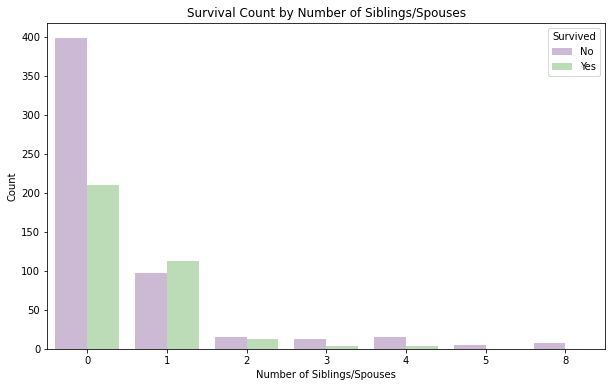

In [502]:
plt.figure(figsize=(10, 6))
sns.countplot(x='SibSp', hue='Survived', data=data, palette='PRGn')
plt.title('Survival Count by Number of Siblings/Spouses')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

1.As the count of induvidual passengers is high, so the count of survived or not survived is also 
high for indivual passengers.

2.The survival rate in induvidual passengers is low, compared to passengers who are having siblings/ Spouses.

### Survival Rate By Parch

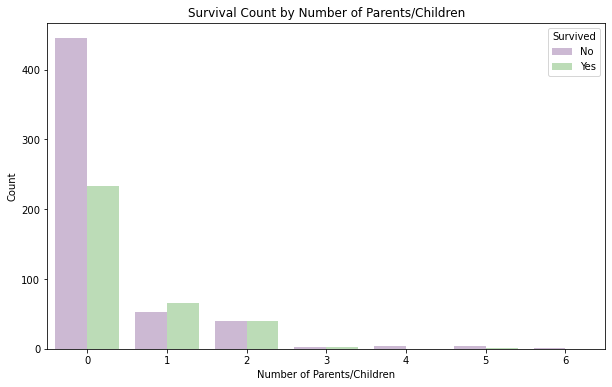

In [503]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Parch', hue='Survived', data=data, palette='PRGn')
plt.title('Survival Count by Number of Parents/Children')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

The survival rate for induvidual passengers is low (who are not having parents/children in the ship)

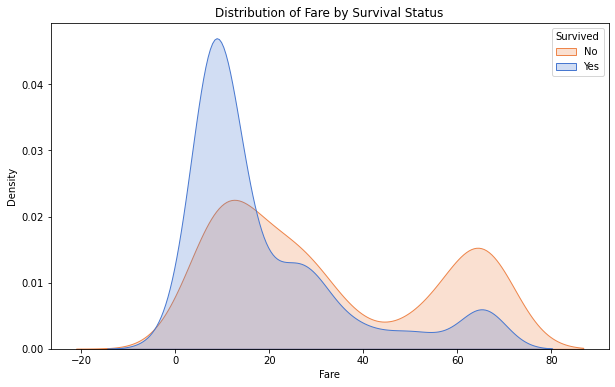

In [504]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Fare', hue='Survived', fill=True, common_norm=False, palette='muted')
plt.title('Distribution of Fare by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

## Multivariate Analysis

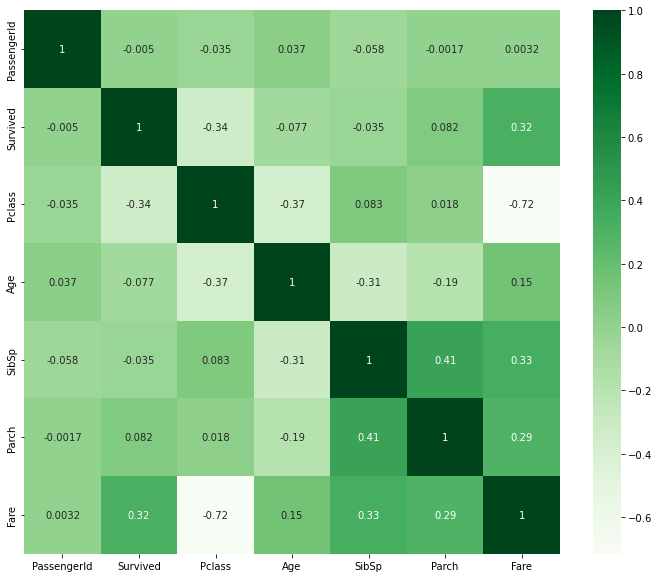

In [505]:
plt.figure(figsize=(12,10))
sns.heatmap(data=data.corr(), annot=True, cmap='Greens')
plt.show()

As we can see in the above plot, There's no multicollinearity between the independent features.

## Encoding Categorical Columns

As we are performing machine learning algorithmns on our data, we have to convert our data into numeric. Hence, 
only the models can understand the data and perform the required operations efficiently. So, encoding is required.

In [506]:
data['Sex']=data['Sex'].map({'male':0, 'female':1})
data['Embarked']=data['Embarked'].map({'S':0, 'C':1, 'Q':2})

## Dropping Unwanted Columns

Dropping the columns which are not ata all used in prediction of the target

In [507]:
data.drop(['Cabin', 'Age Group', 'PassengerId','Name', 'Ticket'],axis=1, inplace=True)

## Missing Values Treatment in Columns Age and Embarked

In [508]:
data['Age']=data['Age'].fillna(data['Age'].mean())
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [509]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [510]:
data['Survived'].value_counts(normalize=True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

## Splitting The Data

1.As our models require some data to learn patterns and trends. So we are giving it some data called training data.

2.Then we have to test the predictions that are made by our model. So we use data to test models performance,
called testing data.

3.Here we are splitting traing and testing data.

In [511]:
x=data.drop('Survived', axis=1)
y=data['Survived']

In [512]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.20, random_state=10)

In [513]:
print('xtrain shape : ', xtrain.shape)
print('ytrain shape : ', ytrain.shape[0])
print('xtest shape : ', xtest.shape)
print('ytest shape : ', ytest.shape[0])

xtrain shape :  (712, 7)
ytrain shape :  712
xtest shape :  (179, 7)
ytest shape :  179


In [514]:
xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
57,3,0,28.500000,0,0,7.2292,1.0
717,2,1,27.000000,0,0,10.5000,0.0
431,3,1,29.699118,1,0,16.1000,0.0
633,1,0,29.699118,0,0,0.0000,0.0
163,3,0,17.000000,0,0,8.6625,0.0
...,...,...,...,...,...,...,...
369,1,1,24.000000,0,0,65.6344,1.0
320,3,0,22.000000,0,0,7.2500,0.0
527,1,0,29.699118,0,0,65.6344,0.0
125,3,0,12.000000,1,0,11.2417,1.0


## Scaling the training and testing data

In [515]:
ss=StandardScaler()
scaled_train=pd.DataFrame(data=ss.fit_transform(xtrain), columns=xtrain.columns)
scaled_test=pd.DataFrame(data=ss.transform(xtest), columns=xtest.columns)

In [516]:
scaled_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.825233,-0.753845,-0.090494,-0.458505,-0.477849,-0.829877,1.045537
1,-0.376333,1.326533,-0.206084,-0.458505,-0.477849,-0.670287,-0.551936
2,0.825233,1.326533,0.001909,0.412044,-0.477849,-0.397049,-0.551936
3,-1.577900,-0.753845,0.001909,-0.458505,-0.477849,-1.182608,-0.551936
4,0.825233,-0.753845,-0.976679,-0.458505,-0.477849,-0.759943,-0.551936


In [517]:
scaled_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.825233,-0.753845,0.410393,-0.458505,-0.477849,-0.834961,-0.551936
1,0.825233,-0.753845,-0.745501,-0.458505,-0.477849,-0.838621,-0.551936
2,0.825233,-0.753845,-0.283143,-0.458505,-0.477849,-0.797352,-0.551936
3,-1.577900,1.326533,2.182763,-0.458505,-0.477849,2.019859,1.045537
4,-1.577900,1.326533,0.410393,0.412044,-0.477849,2.019859,-0.551936


# MODEL BUILDING

In [518]:
perf_score = pd.DataFrame(columns=["Model", "Accuracy","Recall","Precision","F1 Score"] )

In [519]:
def per_measures(model,test,pred):
    accuracy    =accuracy_score(test,pred)
    f1score     =f1_score(test,pred)
    recall      =recall_score(test,pred)
    precision   =precision_score(test,pred)
    return (accuracy,recall,precision,f1score)

In [520]:
def update_performance (name,model,test,pred):
    global perf_score
    perf_score = perf_score.append({'Model'       : name,
                                    'Accuracy'    : per_measures(model,test,pred)[0],
                                    'Recall'      : per_measures(model,test,pred)[1],
                                    'Precision'   : per_measures(model,test,pred)[2],
                                    'F1 Score'    : per_measures(model,test,pred)[3]
                                     },
                                   ignore_index = True)

## Logistic Regression

In [521]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
model_lr=lr.fit(scaled_train, ytrain)

In [522]:
pred_test=model_lr.predict(scaled_test)
pred_proba=model_lr.predict_proba(xtest)[ : ,1]

In [523]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score, f1_score,recall_score,precision_score

print('confusion matrix :''\n',confusion_matrix(ytest, pred_test))
print('roc_auc_score : ',roc_auc_score(ytest, pred_proba))
print('classification report :''\n',classification_report(ytest, pred_test))

confusion matrix :
 [[102  15]
 [ 16  46]]
roc_auc_score :  0.8038323683484975
classification report :
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       117
           1       0.75      0.74      0.75        62

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



In [524]:
update_performance(name = 'Logistic Regression', model = model_lr,test=ytest,pred=pred_test)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.826816,0.741935,0.754098,0.747967


## Naive Bayes

In [525]:
from sklearn.naive_bayes import BernoulliNB

nb=BernoulliNB()
model_nb=nb.fit(scaled_train, ytrain)

In [526]:
pred_train=model_nb.predict(scaled_train)
pred_test=model_nb.predict(scaled_test)
pred_proba=model_lr.predict_proba(scaled_test)[ : ,1]

In [527]:
print('confusion matrix :''\n',confusion_matrix(ytest, pred_test))
print('roc_auc_score : ',roc_auc_score(ytest, pred_proba))
print('classification report :''\n',classification_report(ytest, pred_test))

confusion matrix :
 [[100  17]
 [ 15  47]]
roc_auc_score :  0.8698649021229666
classification report :
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       117
           1       0.73      0.76      0.75        62

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.82      0.82       179



In [528]:
update_performance(name = 'Naive Bayes', model = model_nb,test=ytest,pred=pred_test)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.826816,0.741935,0.754098,0.747967
1,Naive Bayes,0.821229,0.758065,0.734375,0.746032


## KNN Classifier

In [529]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model_knn=knn.fit(scaled_train,ytrain)

pred_test = model_knn.predict(scaled_test)

In [530]:
print('confusion matrix :''\n',confusion_matrix(ytest, pred_test))
print('classification report :''\n',classification_report(ytest, pred_test))

confusion matrix :
 [[98 19]
 [16 46]]
classification report :
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       117
           1       0.71      0.74      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.79       179
weighted avg       0.81      0.80      0.81       179



In [531]:
update_performance(name = 'KNN Classifier', model = model_knn,test=ytest,pred=pred_test)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.826816,0.741935,0.754098,0.747967
1,Naive Bayes,0.821229,0.758065,0.734375,0.746032
2,KNN Classifier,0.804469,0.741935,0.707692,0.724409


## Decision Tree

In [532]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
model_dt=dt.fit(scaled_train, ytrain)

In [533]:
pred_test=model_dt.predict(scaled_test)

In [534]:
print('confusion matrix :''\n',confusion_matrix(ytest, pred_test))
print('classification report :''\n',classification_report(ytest, pred_test))

confusion matrix :
 [[92 25]
 [14 48]]
classification report :
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       117
           1       0.66      0.77      0.71        62

    accuracy                           0.78       179
   macro avg       0.76      0.78      0.77       179
weighted avg       0.80      0.78      0.79       179



In [535]:
update_performance(name = 'Decision Tree Classifier', model = model_dt,test=ytest,pred=pred_test)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.826816,0.741935,0.754098,0.747967
1,Naive Bayes,0.821229,0.758065,0.734375,0.746032
2,KNN Classifier,0.804469,0.741935,0.707692,0.724409
3,Decision Tree Classifier,0.782123,0.774194,0.657534,0.711111


## Random Forest Regressor

In [536]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=55)
model_rf=rf.fit(scaled_train, ytrain)

In [537]:
pred_test=model_rf.predict(scaled_test)

In [538]:
print('confusion matrix :''\n',confusion_matrix(ytest, pred_test))
print('classification report :''\n',classification_report(ytest, pred_test))

confusion matrix :
 [[101  16]
 [ 14  48]]
classification report :
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       117
           1       0.75      0.77      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [539]:
update_performance(name = 'Random Forest Classifier', model = model_rf,test=ytest,pred=pred_test)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.826816,0.741935,0.754098,0.747967
1,Naive Bayes,0.821229,0.758065,0.734375,0.746032
2,KNN Classifier,0.804469,0.741935,0.707692,0.724409
3,Decision Tree Classifier,0.782123,0.774194,0.657534,0.711111
4,Random Forest Classifier,0.832402,0.774194,0.75,0.761905


## XGBoost Classifier

In [540]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [541]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=10)
model_xgb=xgb.fit(scaled_train, ytrain)

pred_test=model_xgb.predict(scaled_test)

In [542]:
print('confusion matrix :''\n',confusion_matrix(ytest, pred_test))
print('classification report :''\n',classification_report(ytest, pred_test))

confusion matrix :
 [[103  14]
 [ 17  45]]
classification report :
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       117
           1       0.76      0.73      0.74        62

    accuracy                           0.83       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179



In [543]:
update_performance(name = 'XGB Classifier', model = model_xgb,test=ytest,pred=pred_test)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.826816,0.741935,0.754098,0.747967
1,Naive Bayes,0.821229,0.758065,0.734375,0.746032
2,KNN Classifier,0.804469,0.741935,0.707692,0.724409
3,Decision Tree Classifier,0.782123,0.774194,0.657534,0.711111
4,Random Forest Classifier,0.832402,0.774194,0.75,0.761905
5,XGB Classifier,0.826816,0.725806,0.762712,0.743802


## Hyper Parameter Tuning

Hence, we are getting some good results in Random Forest and XGB algorithms, we are going to hypertune these models.
So we can try to improve their performance and can obtain good predictions.

## Tuning XGB Classifier

In [544]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=15)

In [545]:
params={'n_estimators':np.arange(1,500), 'learning_rate':[0.01, 0.1, 0.2], 'max_depth':np.arange(2,20),
        'min_child_weight':np.arange(2,20),'max_leaves':np.arange(2,20), 'gamma': np.arange(1,5),
        'reg_lambda':np.arange(1,5),'subsample': [0.8, 0.9, 1.0],'colsample_bytree': [0.8, 0.9, 1.0]}

#### Using Randomized Search CV to get optimum parameters to tune the algorithm.

In [546]:
from sklearn.model_selection import RandomizedSearchCV

random_search=RandomizedSearchCV(estimator=xgb, param_distributions=params, scoring='accuracy',cv=5, random_state=10)

random_search.fit(scaled_train, ytrain)

print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'subsample': 1.0, 'reg_lambda': 2, 'n_estimators': 369, 'min_child_weight': 2, 'max_leaves': 15, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 2, 'colsample_bytree': 0.8}


In [547]:
from xgboost import XGBClassifier
xgb=XGBClassifier(reg_lambda= 2, n_estimators= 495, min_child_weight= 6, max_leaves= 13, 
                  max_depth=2, gamma= 3,subsample=1.0,colsample_bytree= 0.8, random_state=10)
final_model_xgb=xgb.fit(scaled_train, ytrain)

pred_test=final_model_xgb.predict(scaled_test)

In [548]:
print('confusion matrix :''\n',confusion_matrix(ytest, pred_test))
print('classification report :''\n',classification_report(ytest, pred_test))

confusion matrix :
 [[108   9]
 [ 17  45]]
classification report :
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       117
           1       0.83      0.73      0.78        62

    accuracy                           0.85       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



In [549]:
update_performance(name = 'Tuned XGB Classifier', model = final_model_xgb,test=ytest,pred=pred_test)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.826816,0.741935,0.754098,0.747967
1,Naive Bayes,0.821229,0.758065,0.734375,0.746032
2,KNN Classifier,0.804469,0.741935,0.707692,0.724409
3,Decision Tree Classifier,0.782123,0.774194,0.657534,0.711111
4,Random Forest Classifier,0.832402,0.774194,0.75,0.761905
5,XGB Classifier,0.826816,0.725806,0.762712,0.743802
6,Tuned XGB Classifier,0.854749,0.725806,0.833333,0.775862


## Tuning Random Forest Classifier

In [550]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=55)

In [551]:
params={'n_estimators':np.arange(10,500), 'criterion':['gini','entropy'],'max_depth':np.arange(2,20),
        'min_samples_split':np.arange(2,20),'max_leaf_nodes':np.arange(2,20), 'min_samples_leaf':np.arange(2,20),
        'max_features': ['auto', 'sqrt', 'log2'], 'bootstrap': [True, False]}

In [552]:
from sklearn.model_selection import RandomizedSearchCV

random_search=RandomizedSearchCV(estimator=rf, param_distributions=params, scoring='accuracy', cv=5, random_state=15)

random_search.fit(scaled_train, ytrain)

print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 370, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_leaf_nodes': 11, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini', 'bootstrap': False}


In [553]:
rf=RandomForestClassifier(n_estimators= 438, min_samples_split= 18, min_samples_leaf= 2,
                          max_leaf_nodes= 12, max_depth= 11, criterion='entropy', random_state=55,
                          max_features='sqrt', bootstrap=False)

tuned_rf_model=rf.fit(scaled_train, ytrain)
pred_test=tuned_rf_model.predict(scaled_test)

In [554]:
print('confusion matrix :''\n',confusion_matrix(ytest, pred_test))
print('classification report :''\n',classification_report(ytest, pred_test))

confusion matrix :
 [[109   8]
 [ 17  45]]
classification report :
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       117
           1       0.85      0.73      0.78        62

    accuracy                           0.86       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.86      0.86       179



In [555]:
update_performance(name = 'Tuned Random Forest', model = tuned_rf_model,test=ytest,pred=pred_test)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.826816,0.741935,0.754098,0.747967
1,Naive Bayes,0.821229,0.758065,0.734375,0.746032
2,KNN Classifier,0.804469,0.741935,0.707692,0.724409
3,Decision Tree Classifier,0.782123,0.774194,0.657534,0.711111
4,Random Forest Classifier,0.832402,0.774194,0.75,0.761905
5,XGB Classifier,0.826816,0.725806,0.762712,0.743802
6,Tuned XGB Classifier,0.854749,0.725806,0.833333,0.775862
7,Tuned Random Forest,0.860335,0.725806,0.849057,0.782609


#### Predictions for the test data

In [556]:
tuned_rf_model.predict(scaled_test)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

### Confusion Matrix

In [557]:
cm=confusion_matrix(ytest, pred_test)

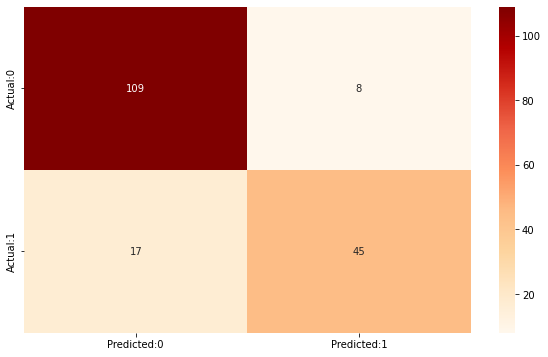

In [558]:
plt.figure(figsize=(10, 6))
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix,fmt='d' ,annot=True, cmap='OrRd')
plt.show()

### ROC Curve

In [559]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold=roc_curve(ytest,pred_proba)

0.8698649021229666


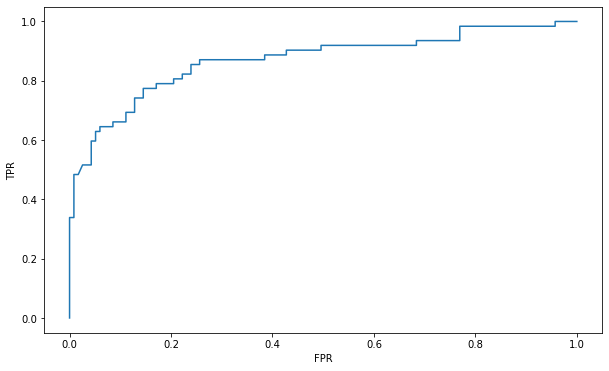

In [560]:
plt.figure(figsize=(10, 6))
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

print(roc_auc_score(ytest,pred_proba))       #Hence we are looking for class 1(survived)

The separability between then classes(0 and 1) is also good.

### Kohen Kappa Score

In [561]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(ytest,pred_test))

0.6806536787268964


Kohen kappa score is 0.68 this means the model is very much reliable.

#### After performing the different algorithms, we got some good results for random forest and xgboost.
#### So, we have tuned the both models to increase the performance.

# After tuning, Random Forest Classifier performed well with increased accuracy upto 86%.

#### This score of 86% is a good score. So we can conclude Random Forest Classifier is the best model 
#### for the data with 86% accuracy score

## Best Features

In [562]:
importances = pd.DataFrame({'feature': x.columns, 'importance': np.round(tuned_rf_model.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False)
importances

,feature,importance
1,Sex,0.475
0,Pclass,0.167
5,Fare,0.153
2,Age,0.080
3,SibSp,0.062
6,Embarked,0.032
4,Parch,0.030


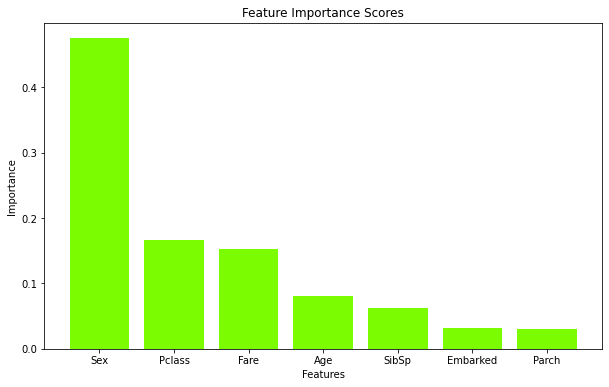

In [563]:
plt.figure(figsize=(10, 6))
plt.bar(importances['feature'], importances['importance'], color='lawngreen')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Scores')
plt.show()

The top 5 important featutres in predicting the target are Sex, Pclass, Fare, Age and SibSp

# ---------------------------THE END--------------------------------